In [1]:
import numpy as np

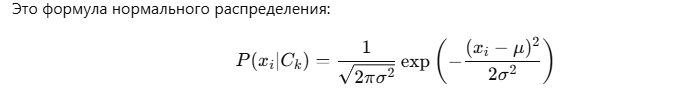

In [6]:
from IPython.display import Image
Image('normal_dist.png')

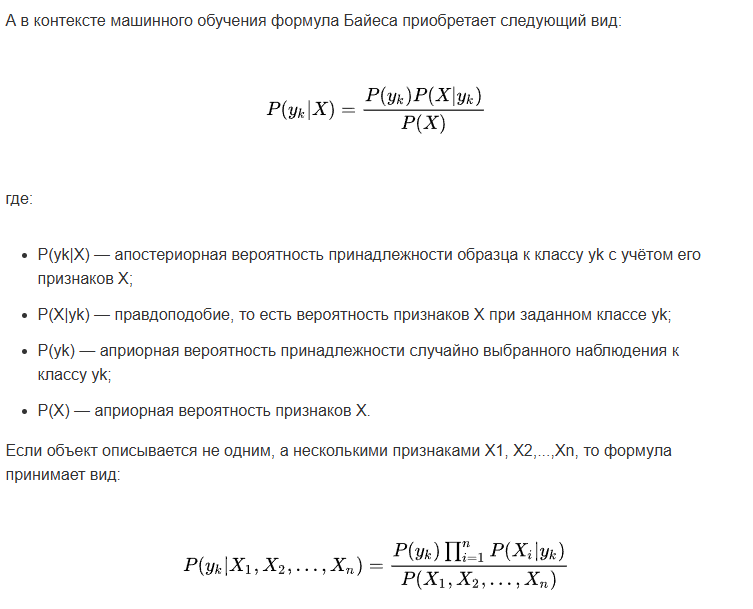

In [10]:
Image('bayes1.png')

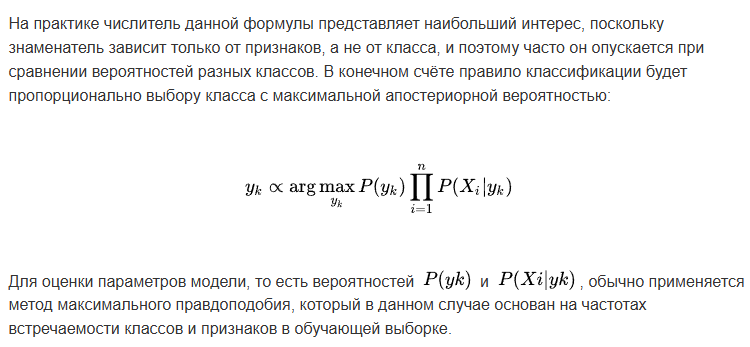

In [11]:
Image('bayes2.png')

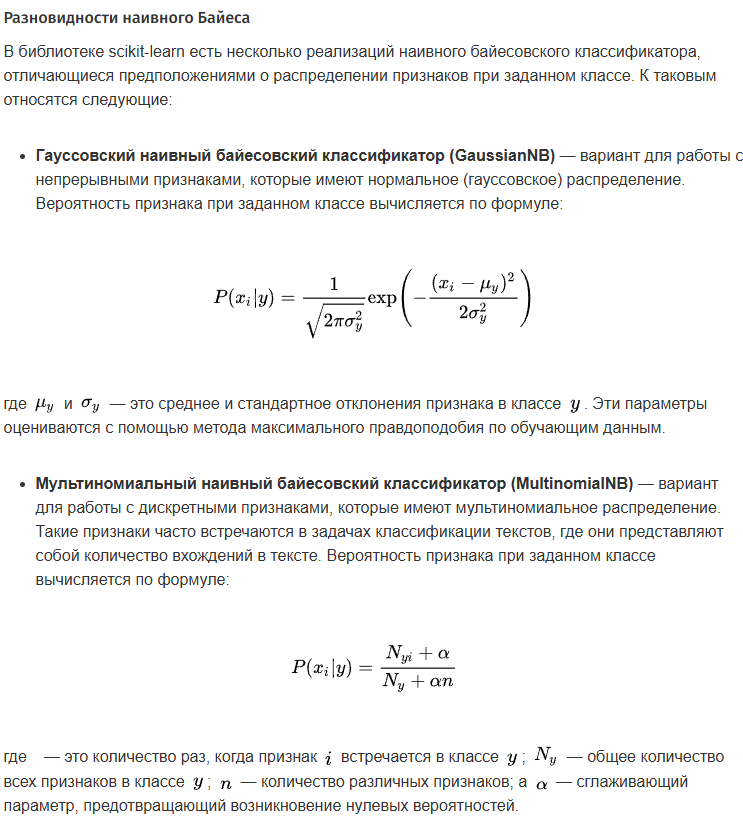

In [12]:
Image('bayes3.png')

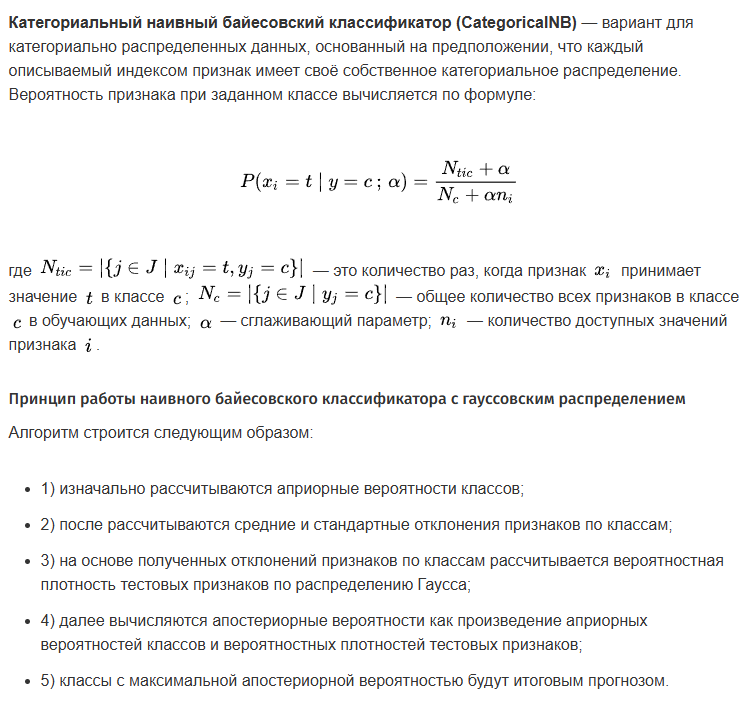

In [13]:
Image('bayes4.png')

In [7]:
class GaussianNB:
    def fit(self,X,y):
        self.classes = np.unique(y)
        self.means = {}
        self.variances = {}
        self.priors = {}

        for cls in self.classes:
            X_c = X[y == cls]                           # все примеры класса cls
            self.means[cls] = np.mean(X_c, axis=0)      # среднее по признакам
            self.variances[cls] = np.var(X_c, axis=0) + 1e-9  # дисперсия + маленькое число (чтобы избежать деления на 0)
            self.priors[cls] = X_c.shape[0] / X.shape[0]      # P(class) = кол-во объектов класса / всего

    def _gaussian_pdf(self, x, mean, var):
        return np.exp(-((x-mean)**2) / (2 * var)) / np.sqrt(2 * np.pi * var) # normal_dist.png

    def _predict_instance(self, x):
        posteriors = [] # Храним вероятности для каждого класса

        for cls in self.classes:
            prior = np.log(self.priors[cls]) # log P(C_k)
            class_conditional = np.sum(np.log(self._gaussian_pdf(x, self.means[cls], self.variances[cls]))) # сумма логарифмов вероятностей P(x_i|C_k)
            posterior = prior + class_conditional # log P(C_k | x) ∝ log P(C_k) + ∑ log P(x_i | C_k)
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)] # Класс с максимальной вероятностью

    def predict(self, X):
        return np.array([self._predict_instance(x) for x in X])
        

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB as SklearnGNB
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_iris()
X, y = data.data, data.target

# Делим
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- Твоя модель ---
my_gnb = GaussianNB()
my_gnb.fit(X_train, y_train)
y_pred_my = my_gnb.predict(X_test)

# --- Sklearn модель ---
sk_gnb = SklearnGNB()
sk_gnb.fit(X_train, y_train)
y_pred_sk = sk_gnb.predict(X_test)

# --- Сравнение ---
print(f"Точность твоей модели: {accuracy_score(y_test, y_pred_my):.2f}")
print(f"Точность sklearn:       {accuracy_score(y_test, y_pred_sk):.2f}")


Точность твоей модели: 0.89
Точность sklearn:       0.98


C:\Users\Alex\AppData\Local\Temp\ipykernel_20864\852392308.py:35: RuntimeWarning: divide by zero encountered in log
  cond_likelihood = np.sum(np.log(self._gaussian_pdf(x, self.means[cls], self.variances[cls])))


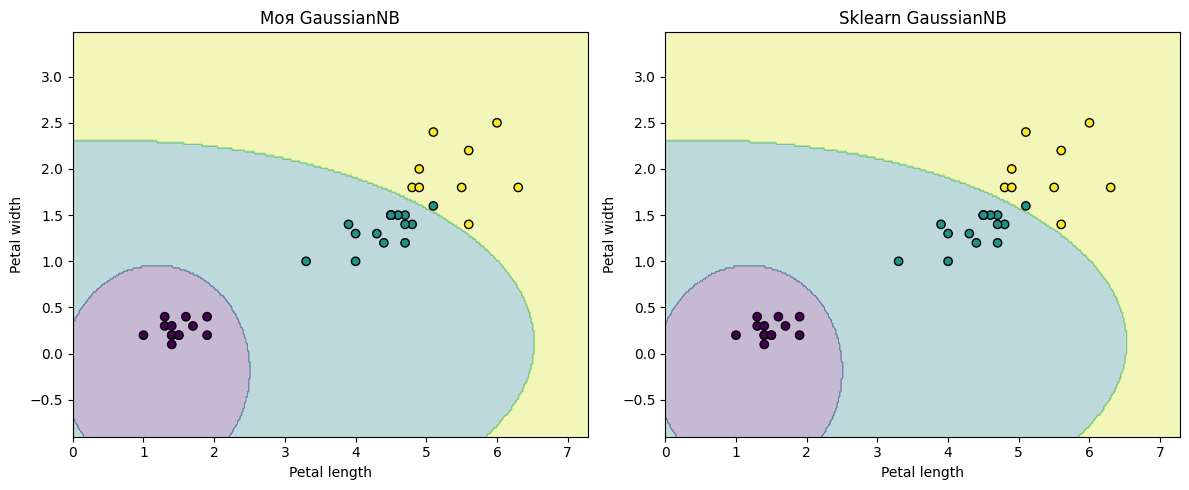

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB as SklearnGNB
from sklearn.model_selection import train_test_split

# ---------- 1. ДАННЫЕ ----------
data = load_iris()
X = data.data[:, [2, 3]]  # petal length and petal width
y = data.target
target_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# ---------- 2. ТВОЯ МОДЕЛЬ ----------
class GaussianNB:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.means = {}
        self.variances = {}
        self.priors = {}
        for cls in self.classes:
            X_c = X[y == cls]
            self.means[cls] = np.mean(X_c, axis=0)
            self.variances[cls] = np.var(X_c, axis=0) + 1e-9
            self.priors[cls] = X_c.shape[0] / X.shape[0]

    def _gaussian_pdf(self, x, mean, var):
        return np.exp(-((x - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)

    def _predict_instance(self, x):
        posteriors = []
        for cls in self.classes:
            prior = np.log(self.priors[cls])
            cond_likelihood = np.sum(np.log(self._gaussian_pdf(x, self.means[cls], self.variances[cls])))
            posteriors.append(prior + cond_likelihood)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        return np.array([self._predict_instance(x) for x in X])

# Обучение
my_gnb = GaussianNB()
my_gnb.fit(X_train, y_train)

sk_gnb = SklearnGNB()
sk_gnb.fit(X_train, y_train)

# ---------- 3. ГРАНИЦЫ ----------
def plot_decision_boundary(model, X, y, title, subplot):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    plt.subplot(1, 2, subplot)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel("Petal length")
    plt.ylabel("Petal width")
    plt.title(title)

# ---------- 4. ПОКАЗ ----------
plt.figure(figsize=(12, 5))
plot_decision_boundary(my_gnb, X_test, y_test, "Моя GaussianNB", 1)
plot_decision_boundary(sk_gnb, X_test, y_test, "Sklearn GaussianNB", 2)
plt.tight_layout()
plt.show()


## Преимущества и недостатки наивного байесовского классификатора
#### Преимущества:

простота в реализации и интерпретации;

практически не требуется настройка параметров;

высокая скорость работы и точность прогнозов во многих ситуациях;

имеет относительно хорошую устойчивость к шуму и выбросам, поскольку основан на вероятностных распределениях и наивном предположении о независимости признаков.

#### Недостатки:

в случае нарушения предположения о независимости признаков, точность прогнозов может значительно снизиться;

может отдавать предпочтение к классам с бОльшим количеством образцов в случае несбалансированных данных.